In [63]:
import pandas as pd 

In [64]:
# Read the file into a DataFrame: df
data = pd.read_csv('https://opendata.housing.gov.ie/dataset/8af4aa49-3b55-4ebc-a46b-517c47ee98eb/resource/c0d9d227-15ab-405a-9a80-dbb1d42e9ed5/download/form_41e-price-new-house-area-by_year_1.csv')

In [65]:
data.shape  # Check the shape of the DataFrame

(78, 8)

In [66]:
data.head() # first 5 rows

,YEAR,Average New House Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
1,1997.0,"102,037","123,231","96,504","111,108","91,236","92,372","94,642"
2,1998.0,"124,368","159,558","112,166","118,917","104,327","108,789","116,639"
3,1999.0,"147,043","191,942","140,797","137,510","122,146","132,510","137,031"
4,2000.0,"166,155","216,433","164,535","160,972","146,838","145,087","154,141"


In [67]:
data.tail() # last 5 rows

,YEAR,Average New House Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
data.sample(10) # 10 random rows

,YEAR,Average New House Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2009.0,"246,315","294,906","255,978","239,370","262,654","228,332","234,696"


In [69]:
# create a dictionary with the new column names
# the keys are the old column names and the values are the new column names 
# the new column names are the values in the first row of the DataFrame 
new_names = dict(zip(data.columns[2:], data.iloc[0, 2:]))

# rename the columns using the dictionary3
# from the second column onwards, rename the columns using the dictionary 
# Because their name is the same as the value in the first row, the first row is no longer needed

data = data.rename(columns=new_names)

# print the updated DataFrame
data.head(1)

,YEAR,Average New House Price,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas


In [70]:

data = data.drop(0) # drop the first row

In [71]:
data.isnull().sum() # check for missing values

YEAR                       58
Average New House Price    58
Dublin                     58
Cork                       58
Galway                     58
Limerick                   58
Waterford                  58
Other Areas                58
dtype: int64

In [72]:
data = data.dropna() # drop rows with missing values

In [73]:
data.info() # check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 19
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     19 non-null     float64
 1   Average New House Price  19 non-null     object 
 2   Dublin                   19 non-null     object 
 3   Cork                     19 non-null     object 
 4   Galway                   19 non-null     object 
 5   Limerick                 19 non-null     object 
 6   Waterford                19 non-null     object 
 7   Other Areas              19 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.3+ KB


In [74]:
data["YEAR"] = data['YEAR'].astype(int) # convert the YEAR column to integer type (int64) data["YEAR"].dtype # check the data type of the YEAR column

In my "data" DataFrame the numaric values have "," instead of "." and it makes non-integer or float values.
First I will make them string after convert the "," into "."
At the end I will be able to convert my numerical values integer or float from string.
Additionally the "Dublin " has a space at the end I will change that too for easier analysis.

In [75]:
# Convert columns to float type and replace commas with periods
cols_to_convert = ["Average New House Price", "Dublin ", "Cork", "Galway", "Limerick", "Waterford", "Other Areas"]
for col in cols_to_convert:
    data[col] = data[col].str.replace(",", ".").astype(float)
    
# Rename Dublin column to remove trailing space
data.rename(columns={'Dublin ': 'Dublin'}, inplace=True)


In [76]:
data.info() # check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 19
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     19 non-null     int64  
 1   Average New House Price  19 non-null     float64
 2   Dublin                   19 non-null     float64
 3   Cork                     19 non-null     float64
 4   Galway                   19 non-null     float64
 5   Limerick                 19 non-null     float64
 6   Waterford                19 non-null     float64
 7   Other Areas              19 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.3 KB


In [77]:
data1 = pd.read_csv('IRL.csv') # I have gathered this data from: https://data.worldbank.org/

In [78]:
data1.head() # display first 5 rows

,YEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Population, total",3.674171e+06,3.712696e+06,3.754786e+06,3.805174e+06,3.866243e+06,3.931947e+06,3.996521e+06,4.070262e+06,4.159914e+06,4.273591e+06,4.398942e+06,4.489544e+06,4.535375e+06,4.560155e+06,4.580084e+06,4.599533e+06,4.623816e+06,4.657740e+06,4.701957e+06
1,Interest rate spread (lending rate minus depos...,6.900000e+00,5.850000e+00,5.600000e+00,6.090000e+00,6.900000e+00,4.700000e+00,4.200000e+00,3.490000e+00,3.650000e+00,4.860000e+00,5.460000e+00,5.860000e+00,4.160000e+00,4.020000e+00,4.420000e+00,4.330000e+00,4.380000e+00,4.200000e+00,4.050000e+00
2,"Inflation, consumer prices (annual %)",1.525605e+00,2.415518e+00,1.631924e+00,5.590717e+00,4.872905e+00,4.614733e+00,3.490490e+00,2.199629e+00,2.429692e+00,3.931640e+00,4.897116e+00,4.060305e+00,-4.478103e+00,-9.220958e-01,2.557189e+00,1.696209e+00,5.087149e-01,1.825423e-01,-2.898791e-01


In [79]:
data1.head().T # check the rows of the data frame

,0,1,2
YEAR,"Population, total",Interest rate spread (lending rate minus depos...,"Inflation, consumer prices (annual %)"
1997,3674171.0,6.9,1.525605
1998,3712696.0,5.85,2.415518
1999,3754786.0,5.6,1.631924
2000,3805174.0,6.09,5.590717
2001,3866243.0,6.9,4.872905
2002,3931947.0,4.7,4.614733
2003,3996521.0,4.2,3.49049
2004,4070262.0,3.49,2.199629
2005,4159914.0,3.65,2.429692


In [80]:
# transpose the DataFrame so that the columns become the rows and the rows become the columns for better view of the dataset
data1 = data1.transpose() 
data1.head() # first 5 rows

,0,1,2
YEAR,"Population, total",Interest rate spread (lending rate minus depos...,"Inflation, consumer prices (annual %)"
1997,3674171.0,6.9,1.525605
1998,3712696.0,5.85,2.415518
1999,3754786.0,5.6,1.631924
2000,3805174.0,6.09,5.590717


In the code below:

By zipping the column names from the "data1" DataFrame with the values from the first row of the same DataFrame, the "new_names" dictionary is produced. 
The old column names serve as keys and the new column names serve as values in the resulting dictionary. The columns of the "data1" DataFrame are then "renamed" using this dictionary and the rename() method.


In [81]:
new_names = dict(zip(data1.columns[:], data1.iloc[0,:])) # create a dictionary with the new column names based on the first row of the DataFrame

data1 = data1.rename(columns=new_names) # rename the columns using the dictionary

data1.head() # first 5 rows

,"Population, total","Interest rate spread (lending rate minus deposit rate, %)","Inflation, consumer prices (annual %)"
YEAR,"Population, total",Interest rate spread (lending rate minus depos...,"Inflation, consumer prices (annual %)"
1997,3674171.0,6.9,1.525605
1998,3712696.0,5.85,2.415518
1999,3754786.0,5.6,1.631924
2000,3805174.0,6.09,5.590717


In [82]:
df = data1.iloc[1:]  # drop the first row of the DataFrame because it is not needed anymore

In [83]:
df # check the updated DataFrame

,"Population, total","Interest rate spread (lending rate minus deposit rate, %)","Inflation, consumer prices (annual %)"
1997,3674171.0,6.9,1.525605
1998,3712696.0,5.85,2.415518
1999,3754786.0,5.6,1.631924
2000,3805174.0,6.09,5.590717
2001,3866243.0,6.9,4.872905
2002,3931947.0,4.7,4.614733
2003,3996521.0,4.2,3.49049
2004,4070262.0,3.49,2.199629
2005,4159914.0,3.65,2.429692
2006,4273591.0,4.86,3.93164


In [84]:
df = df.rename_axis(None, axis=1) # rename the index column to YEAR 
df.head() # first 5 rows

,"Population, total","Interest rate spread (lending rate minus deposit rate, %)","Inflation, consumer prices (annual %)"
1997,3674171.0,6.9,1.525605
1998,3712696.0,5.85,2.415518
1999,3754786.0,5.6,1.631924
2000,3805174.0,6.09,5.590717
2001,3866243.0,6.9,4.872905


In [85]:
df = df.reset_index().rename(columns={'index': 'YEAR'}) # rename the index column to YEAR


In [86]:
df.head() # first 5 rows

,YEAR,"Population, total","Interest rate spread (lending rate minus deposit rate, %)","Inflation, consumer prices (annual %)"
0,1997,3674171.0,6.9,1.525605
1,1998,3712696.0,5.85,2.415518
2,1999,3754786.0,5.6,1.631924
3,2000,3805174.0,6.09,5.590717
4,2001,3866243.0,6.9,4.872905


In [87]:
df.info() # check the data types of the columns because we need to convert the YEAR column to integer type for merging with the other DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   YEAR                                                       19 non-null     object
 1   Population, total                                          19 non-null     object
 2   Interest rate spread (lending rate minus deposit rate, %)  19 non-null     object
 3   Inflation, consumer prices (annual %)                      19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [88]:
df["YEAR"] = df['YEAR'].astype(int) # convert the YEAR column to integer type so we can merge the two DataFrames
# check the data type of the YEAR column

In [89]:
merged_data = pd.merge(data, df, on='YEAR', how='left') # merge the two DataFrames on the YEAR column for further analysis


Checking our new dataset

In [90]:
merged_data.head()

,YEAR,Average New House Price,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,"Population, total","Interest rate spread (lending rate minus deposit rate, %)","Inflation, consumer prices (annual %)"
0,1997,102.037,123.231,96.504,111.108,91.236,92.372,94.642,3674171.0,6.9,1.525605
1,1998,124.368,159.558,112.166,118.917,104.327,108.789,116.639,3712696.0,5.85,2.415518
2,1999,147.043,191.942,140.797,137.510,122.146,132.510,137.031,3754786.0,5.6,1.631924
3,2000,166.155,216.433,164.535,160.972,146.838,145.087,154.141,3805174.0,6.09,5.590717
4,2001,181.146,252.192,175.372,171.578,154.515,157.767,167.493,3866243.0,6.9,4.872905


In [91]:
merged_data = merged_data.rename(columns={'Population, total': 'Total Population',
                                          'Interest rate spread (lending rate minus deposit rate, %)': 'Highest Mortgage Rate %',
                                          'Inflation, consumer prices (annual %)': 'Inflation %',
                                          'Average New House Price': 'Avg House Price in IE',
                                          'YEAR': 'Year',
                                          })


Let's see our new data frame

In [92]:
merged_data.head()

,Year,Avg House Price in IE,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,Total Population,Highest Mortgage Rate %,Inflation %
0,1997,102.037,123.231,96.504,111.108,91.236,92.372,94.642,3674171.0,6.9,1.525605
1,1998,124.368,159.558,112.166,118.917,104.327,108.789,116.639,3712696.0,5.85,2.415518
2,1999,147.043,191.942,140.797,137.510,122.146,132.510,137.031,3754786.0,5.6,1.631924
3,2000,166.155,216.433,164.535,160.972,146.838,145.087,154.141,3805174.0,6.09,5.590717
4,2001,181.146,252.192,175.372,171.578,154.515,157.767,167.493,3866243.0,6.9,4.872905


In [93]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19 non-null     int64  
 1   Avg House Price in IE    19 non-null     float64
 2   Dublin                   19 non-null     float64
 3   Cork                     19 non-null     float64
 4   Galway                   19 non-null     float64
 5   Limerick                 19 non-null     float64
 6   Waterford                19 non-null     float64
 7   Other Areas              19 non-null     float64
 8   Total Population         19 non-null     object 
 9   Highest Mortgage Rate %  19 non-null     object 
 10  Inflation %              19 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1.8+ KB


In this analysis, the focus is on Dublin house prices, and numerical values for "Total Population," "Highest Mortgage Rate %," and "Inflation %" are required for further mathematical analysis. Therefore, these columns will be converted to numerical variables using appropriate methods in order to facilitate accurate analysis and modeling.

In [94]:
# convert columns to appropriate data types
merged_data = merged_data.astype({
    "Total Population": int,
    "Highest Mortgage Rate %": float,
    "Inflation %": float
})

In [95]:
merged_data # NEW MERGED_DATA

,Year,Avg House Price in IE,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,Total Population,Highest Mortgage Rate %,Inflation %
0,1997,102.037,123.231,96.504,111.108,91.236,92.372,94.642,3674171,6.90,1.525605
1,1998,124.368,159.558,112.166,118.917,104.327,108.789,116.639,3712696,5.85,2.415518
2,1999,147.043,191.942,140.797,137.510,122.146,132.510,137.031,3754786,5.60,1.631924
3,2000,166.155,216.433,164.535,160.972,146.838,145.087,154.141,3805174,6.09,5.590717
4,2001,181.146,252.192,175.372,171.578,154.515,157.767,167.493,3866243,6.90,4.872905
5,2002,194.835,259.381,184.884,187.194,169.577,169.681,179.988,3931947,4.70,4.614733
6,2003,220.573,302.270,210.733,222.578,193.854,193.642,203.421,3996521,4.20,3.490490
7,2004,244.852,343.251,236.076,241.545,209.850,218.447,228.974,4070262,3.49,2.199629
8,2005,272.034,386.089,264.719,274.745,226.773,245.315,255.730,4159914,3.65,2.429692
9,2006,297.476,473.634,298.122,287.103,282.309,270.108,278.756,4273591,4.86,3.931640


In [96]:
# Let's check the data types of the columns
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19 non-null     int64  
 1   Avg House Price in IE    19 non-null     float64
 2   Dublin                   19 non-null     float64
 3   Cork                     19 non-null     float64
 4   Galway                   19 non-null     float64
 5   Limerick                 19 non-null     float64
 6   Waterford                19 non-null     float64
 7   Other Areas              19 non-null     float64
 8   Total Population         19 non-null     int64  
 9   Highest Mortgage Rate %  19 non-null     float64
 10  Inflation %              19 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 1.8 KB


### As we see above now my dataset is ready for further analysis.

In [97]:
# I am keeping the data for myself, so I will save it to a csv file on my desktop
# I will use the os module to get the path to my desktop
import os
file_name = 'merged_data.csv'
desktop_directory = os.path.join(os.path.expanduser('~'), 'Desktop') 
output_file_path = os.path.join(desktop_directory, file_name)
merged_data.to_csv(output_file_path, index=False)

# STATISTIC AND VISUALIZATION

Let's import the necessary libraries

In [98]:
# Import the necessary modules
import warnings # import the warnings module
import seaborn as sns # import the seaborn module
import matplotlib.pyplot as plt # import the matplotlib module
warnings.filterwarnings("ignore") # ignore warnings
pd.set_option("display.max_rows",None) # display all rows
import matplotlib  # import the matplotlib module
import scipy.stats as stats # import the stats module from the scipy library
from scipy.stats import norm # import the norm module from the stats module of the scipy library

Before starting visualise my dataset let's see mean, std, max and min values. I will use .describe method()

In [99]:
# Let's describe the data to see the summary statistics of the data set 
merged_data.describe()

,Year,Avg House Price in IE,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,Total Population,Highest Mortgage Rate %,Inflation %
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000
mean,2006.000000,224.957632,309.492158,223.630263,215.932211,202.387632,195.253789,208.699947,4.231182e+06,4.901053,2.153413
std,5.627314,60.311751,97.607447,63.859395,56.306805,58.336559,57.672653,56.225711,3.658243e+05,1.040464,2.455865
min,1997.000000,102.037000,123.231000,96.504000,111.108000,91.236000,92.372000,94.642000,3.674171e+06,3.490000,-4.478103
25%,2001.500000,187.990500,255.786500,180.128000,179.386000,162.046000,155.909000,173.740500,3.899095e+06,4.180000,1.017160
50%,2006.000000,233.173000,302.270000,241.127000,221.159000,212.882000,193.642000,215.439000,4.273591e+06,4.420000,2.415518
75%,2010.500000,259.680500,362.367500,256.372500,241.690000,229.810000,226.176500,243.755500,4.570120e+06,5.725000,3.995972
max,2015.000000,320.788000,484.926000,326.765000,302.208000,290.670000,295.397000,299.884000,4.701957e+06,6.900000,5.590717


* We can see that the average house price in Ireland ranges from 102,000 to 282,000 euros over the 19 years in the dataset. The standard deviation of house prices is 60,744 euros, indicating a wide range of prices

* Total Population values range from around 3.7 million to 4.7 million people.

* Highest Mortgage Rate % values range from 3.49% to 6.9%, with an average of around 4.9%.

* Inflation % values range from -4.48% to 5.59%, with an average of around 2.15%. Negative values indicate deflation, while positive values indicate inflation.

In [100]:
mean = merged_data['Dublin'].mean() # calculate the mean of the Dublin column
std = merged_data['Dublin'].std() # calculate the standard deviation of the Dublin column

In [101]:
# calculate probability of average house price in Dublin being less than 300,000 euros
prob_less_than_300k = norm.cdf(300, loc=mean, scale=std)
print(f"Probability of average house price in Dublin being less than 300,000 euros: {prob_less_than_300k:.2f}")


Probability of average house price in Dublin being less than 300,000 euros: 0.46


In [102]:
# calculate 95% confidence interval for average house price in Dublin
conf_int = norm.interval(0.95, loc=mean, scale=std)
print(f"95% confidence interval for average house price in Dublin: {conf_int}")


95% confidence interval for average house price in Dublin: (118.185078128459, 500.79923766101473)


In this instance, the range of the average property price in Dublin within the 95% confidence interval is between 118,185 and 500,799 euros. 

In [103]:
norm_prop = norm(loc=mean, scale=std)
norm_prop.sf(500.000) # calculate the survival function (1 - cdf) at x
print("Probability of house price in Dublin being greater than 500,000 : ", norm_prop.sf(500.000))
# The result of this code indicates that the probability of house price in Dublin being greater than 500,000

Probability of house price in Dublin being greater than 500,000 :  0.025482420327711367


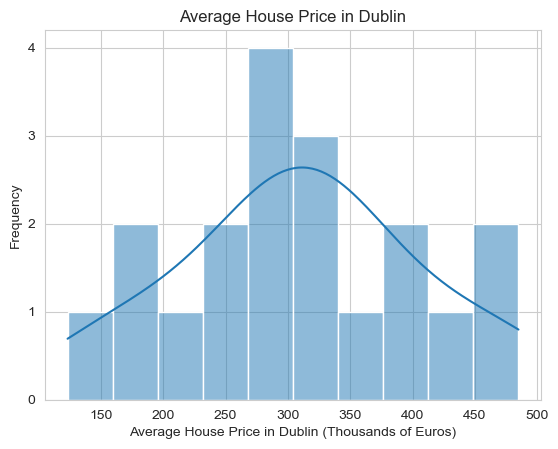

In [104]:
# plot histogram of average house prices in Dublin with seaborn and matplotlib 
import numpy as np
dublin=merged_data["Dublin"] # create a variable for the average house prices in Dublin
sns.histplot(dublin, bins=10, kde=True) # plot histogram with seaborn and set the number of bins to 10 and kde to True. So we can see kernel density estimation
plt.title('Average House Price in Dublin') # I will name the title of the histogram to Average House Price in Dublin 
plt.xlabel('Average House Price in Dublin (Thousands of Euros)') # I will change the x-axis label to Average House Price in Dublin (Thousands of Euros)
plt.ylabel('Frequency') # I will change the y-axis label to Frequency
plt.yticks(np.arange(0, 5, step=1)) # Update the step size of the y-axis
plt.show() # display the histogram

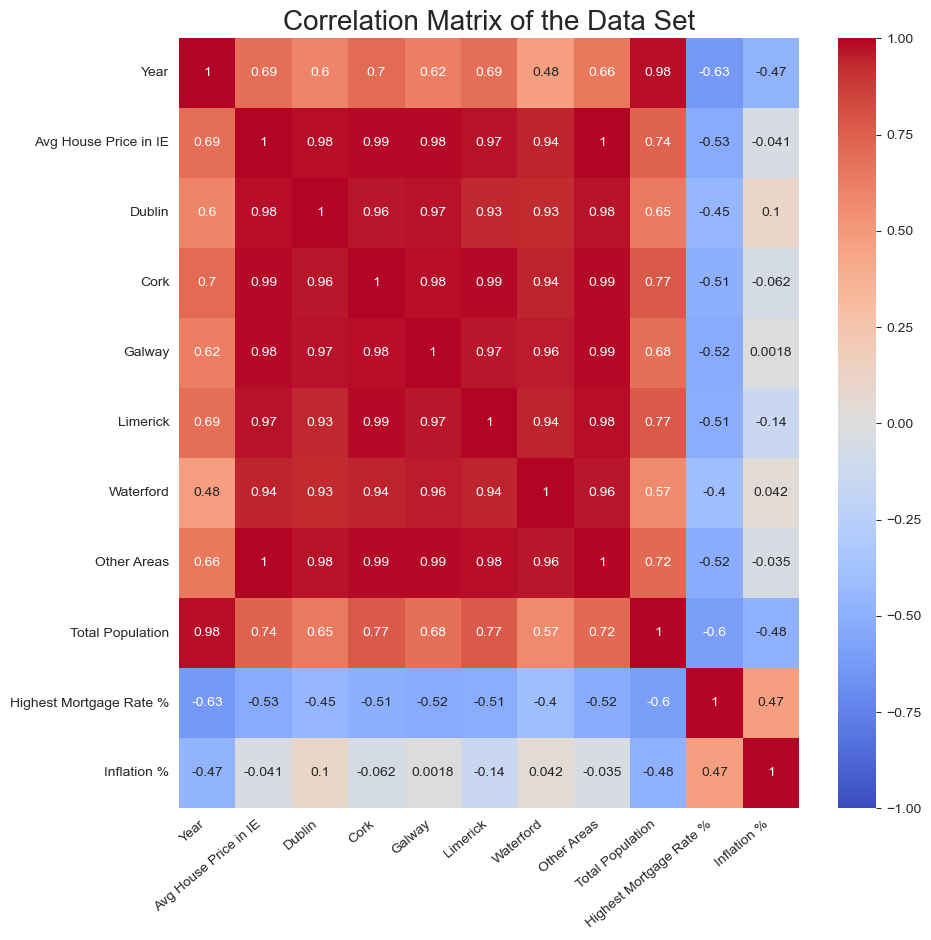

In [105]:
plt.figure(figsize=(10, 10)) # set the size of the figure to 10 by 10
ax = sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) # create the heatmap
# I will set the annot to True to display the correlation values in the heatmap and I will set the cmap to coolwarm to display the heatmap with a coolwarm color scheme
# I set annot True because I want to see the correlation values in the heatmap
# vmin and vmax are the minimum and maximum values of the data set. I set them to -1 and 1 because I want to see the correlation values between -1 and 1

ax.set_title('Correlation Matrix of the Data Set', fontsize=20) # set the title of the heatmap
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right') # rotate the x-axis labels by 40 degrees
plt.show() # display the heatmap

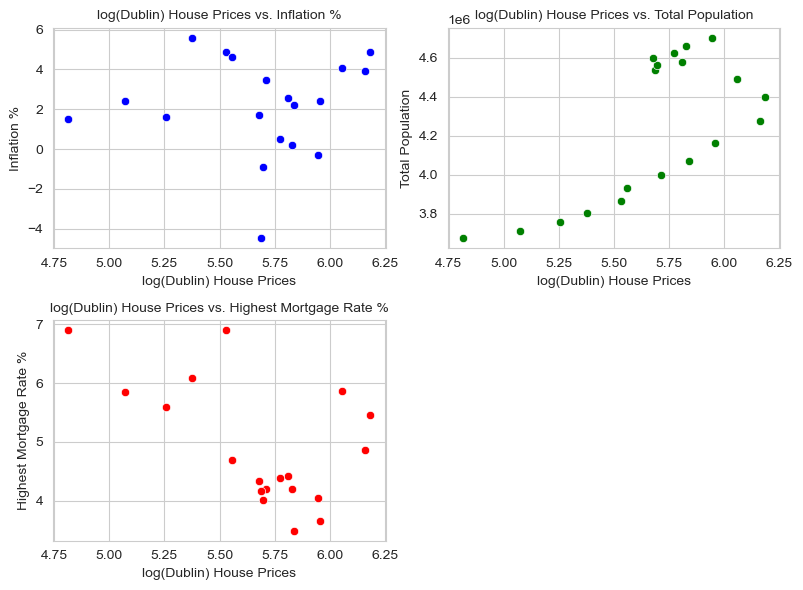

In [106]:
import numpy as np # import the numpy module

merged_data['log_Dublin'] = np.log(merged_data['Dublin']) # create a new column called log_Dublin and store the log of the Dublin column in it

sns.set_style('whitegrid') # set the style of the plots to whitegrid 
plt.figure(figsize=(8, 6)) # set the size of the figure to 8 by 6 

variables = ['Inflation %', 'Total Population', 'Highest Mortgage Rate %'] # create a list of variables 
colors = ['blue', 'green', 'red'] # create a list of colors 

for i, variable in enumerate(variables): # loop through the variables and colors list 
    plt.subplot(2, 2, i+1) # create a subplot with 2 rows and 2 columns
    sns.scatterplot(data=merged_data, x='log_Dublin', y=variable, color=colors[i]) # create the scatter plot
    plt.title(f'log(Dublin) House Prices vs. {variable}', fontsize=10) # set the title of the plot to log(Dublin) House Prices vs. variable
    plt.xlabel('log(Dublin) House Prices', fontsize=10) # set the x-axis label of the plot to log(Dublin) House Prices 
    plt.ylabel(variable, fontsize=10)

plt.tight_layout()
plt.show()


Before starting further visualizing, I would like to add the source of plotly express for my lecturer Sam Weiss. The code from this website, I took the code and adjusted for my analysis:
https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem YEAR : 2022

In [107]:
# Import the plotly.express module as px for interactive plots
import plotly.express as px

fig = px.line(merged_data, x='Year', y=['Avg House Price in IE', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford', 'Other Areas'], # I will plot the average house price in Ireland and the average house price in the other regions
              # x and y arguments are used to specify the columns to be used for the x and y axes
              title='Average House Prices by Region over Time') # I will set the title of the figure
fig.update_layout(xaxis_title='Year', yaxis_title='Price (in thousands)') # I will set the title of the x and y axis
# I will change the size of the figure
fig.update_layout(width=1000, height=600) # I will set the width and height of the figure to 1000 and 600 respectively 
# I will change the x axis step to 1 year for better readability
fig.update_xaxes(dtick=1) # 


fig.show()

In [108]:
fig = px.line(merged_data, x='Year', y=['Inflation %', 'Highest Mortgage Rate %']) # create the line chart
fig.update_layout(title='Inflation and Highest Mortgage Rate over Time (%)', xaxis_title='Year', yaxis_title='Percentage (%)') # I will change the title of the figure
fig.update_layout(width=1200, height=600)
fig.update_xaxes(dtick=1) # I will change the x axis step to 1
fig.show()


# MACHINE LEARNING

### Now I will start to apply a multiple regression model, lasso(l1 regularization), ridge(l2 regularization), and decision tree regressor and I will use the data from 1997-2014 for predicting the 2015 average house price in Dublin. The best model will then be the one that comes the closest.

In [109]:
# Importing the necessary libraries
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV for hyperparameter tuning
from sklearn.linear_model import Lasso # Importing Lasso for linear regression with L1 regularization
from sklearn.linear_model import Ridge # Importing Ridge for linear regression with L2 regularization
from sklearn.tree import DecisionTreeRegressor # Importing DecisionTreeRegressor for decision tree regression
from sklearn.linear_model import LinearRegression # Importing LinearRegression for linear regression
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the data into training and testing sets
from sklearn.metrics import r2_score # Importing r2_score for calculating the R-squared value

###  Multiple Regression

In [110]:
# Select relevant features and target variable for Dublin from 1997 to 2014
dublin_data = merged_data.loc[(merged_data['Year'] >= 1997) & (merged_data['Year'] <= 2014), ['Dublin', 'Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %', 'Avg House Price in IE']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dublin_data.loc[:, ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %']].values, dublin_data.loc[:, 'Dublin'].values, test_size=0.2, random_state=42)

# Train the model
linear_model = LinearRegression() # Create a linear regression model
linear_model.fit(X_train, y_train) # Train the model

# Calculate R^2 using sklearn's r2_score function on the training and testing sets
train_r2 = r2_score(y_train, linear_model.predict(X_train)) # Calculate R^2 on the training set
test_r2 = r2_score(y_test, linear_model.predict(X_test)) # Calculate R^2 on the testing set
print("R^2 score on training set:", train_r2)   # Print R^2 on training set
print("R^2 score on testing set:", test_r2)     # Print R^2 on testing set


R^2 score on training set: 0.7093187766081941
R^2 score on testing set: 0.7731555325463024


#### Applying Lasso and Ridge regularizations to prevent any overfitting

##### GridSearchCV Hyperparameter tuning for Lasso regularization

In [111]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100], # alpha is the regularization strength. It is the inverse of the regularization strength. So, a smaller alpha value specifies a stronger regularization
}
# alpha is the regularization strength. It is the inverse of the regularization strength. So, a smaller alpha value specifies a stronger regularization

# Create a Lasso model
lasso = Lasso()

# I will use GridSearchCV to search for the best hyperparameters
# estimator is the model to use for hyperparameter tuning
# param_grid is the hyperparameter grid to search
# cv is the number of folds to use for cross-validation
# scoring is the metric to use for evaluating the model
# n_jobs is the number of jobs to run in parallel. I set it to -1 to use all processors
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train) 

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'alpha': 1}
Best score:  3694.9459243732686


In [112]:
# Train the model using Lasso Regression
lasso_model = Lasso(alpha=1)  # Adjust the alpha according to the best hyperparameters
lasso_model.fit(X_train, y_train) # Train the model
 
# Calculate R^2 using sklearn's r2_score function on the training and testing sets
train_r2 = r2_score(y_train, lasso_model.predict(X_train))
test_r2 = r2_score(y_test, lasso_model.predict(X_test))
print("R^2 score on training set:", train_r2)
print("R^2 score on testing set:", test_r2)

R^2 score on training set: 0.7085058723776207
R^2 score on testing set: 0.7581753156011952


#### Hyperparameter tuning for Ridge regularization

In [113]:
# Perform hyperparameter tuning using GridSearchCV
# Create an instance of the Ridge class
ridge = Ridge()
# estimator is the model to be used for hyperparameter tuning
# param_grid is the dictionary of hyperparameters to be used for tuning
# cv is the number of folds to be used for cross-validation
# scoring is the metric to be used for evaluating the model
# verbose is the level of verbosity
# n_jobs is the number of jobs to be run in parallel
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

# Train the final model on the training set with the best hyperparameters
ridge_model = grid_search.best_estimator_
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters:  {'alpha': 1}
Best score:  3508.033210761333


Ridge(alpha=1)

In [114]:
# Train the model using Ridge Regression
ridge_model = Ridge(alpha=1)  # Adjust the alpha according the GridsearchCV
ridge_model.fit(X_train, y_train) 

# Calculate R^2 using sklearn's r2_score function on the training and testing sets
train_r2 = r2_score(y_train, ridge_model.predict(X_train))
test_r2 = r2_score(y_test, ridge_model.predict(X_test))
print("R^2 score on training set:", train_r2)
print("R^2 score on testing set:", test_r2)


R^2 score on training set: 0.7056400959494376
R^2 score on testing set: 0.7424473987359418


#### GriSearchCV for decision tree hyperparameters

In [115]:
# Define the hyperparameter grid for the grid search
param_grid = {
    'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)



Fitting 5 folds for each of 4180 candidates, totalling 20900 fits
Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 13}


## Decision Tree Regressor

In [116]:

# Train the model using Decision Tree Regressor
# Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
tree_model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=13, random_state=42)
tree_model.fit(X_train, y_train)

# Calculate R^2 using sklearn's r2_score function on the training and testing sets
train_r2 = r2_score(y_train, tree_model.predict(X_train))
test_r2 = r2_score(y_test, tree_model.predict(X_test))
print("Decision Tree R^2 score on training set:", train_r2)
print("Decision Tree R^2 score on testing set:", test_r2)


Decision Tree R^2 score on training set: 0.44593618319089556
Decision Tree R^2 score on testing set: 0.6259176117954808


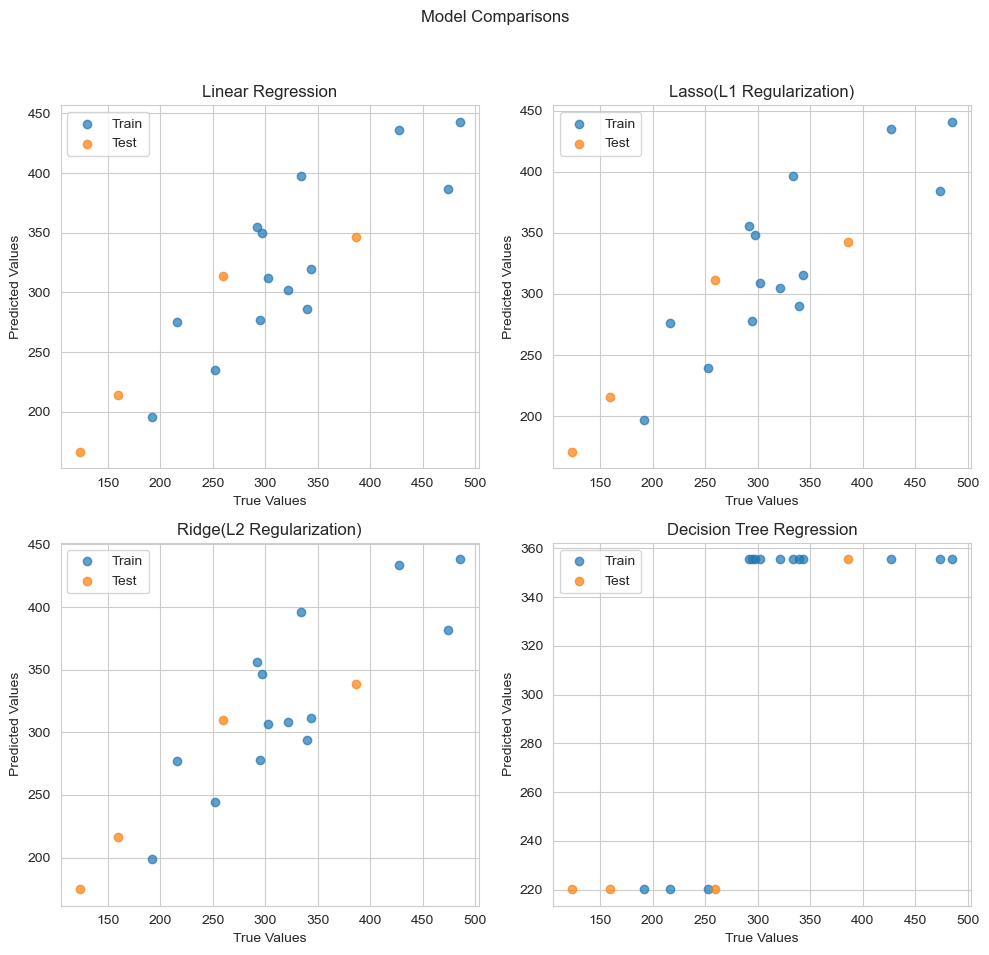

In [117]:
# Define a list of tuples containing the names and instances of the four regression models: linear_model, lasso_model, ridge_model, tree_model
models = [('Linear Regression', linear_model), ('Lasso(L1 Regularization)', lasso_model), ('Ridge(L2 Regularization)', ridge_model), ('Decision Tree Regression', tree_model)]

# Create a figure with 2x2 subplots and adjust the figure size to 10x10 inches 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Model Comparisons') # Change the title to 'Regression Model Predictions'

# Loop through the list of tuples containing the names and instances of the four regression models
# The zip() function combines the models and axes, while axes.flatten() is used to organize the subplots in a single row:

for (model_name, model), ax in zip(models, axes.flatten()): # Change the axes to axes.flatten() to plot all the subplots in one row 

    #Predict the target values for the training and test sets using the present model inside the loop:
    y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
    
    # Use scatter plots to compare the true values for the training and testing sets to the anticipated values. 
    # The labels "Train" and "Test" are added for each each plot:
    ax.scatter(y_train, y_train_pred, label='Train', alpha=0.7) # The alpha parameter in the scatter plot is only related to the opacity of the data points
    ax.scatter(y_test, y_test_pred, label='Test', alpha=0.7)    # in the visualization and has no impact on the model's training or performance.
    # Label the x and y axes as "True Values" and "Predicted Values," respectively, and set the current subplot's title to the name of the current model(model_name):
    ax.set_title(model_name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    # Add a legend to the current subplot to distinguish between the training and testing sets:
    ax.legend()
# After the loop, modify the placement of the subplots to avoid duplication and guarantee appropriate spacing:
# 0 for left, 0.03 for bottom, 1 for right, 0.95 for top
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The Decision Tree Regression model has created a tree with a few splits, resulting in two different regions with distinct predicted values. The presence of two horizontal lines indicates that the Decision Tree has created two distinct levels of predictions. The Decision Tree made predictions based on the structure of the tree itself, while the other models rely on linear combinations of input features.

# Using the Multiple Linear Regression Model to predict 2015 Dublin house prices

In [118]:
# Select data from 1997 to 2014
train_data = merged_data.loc[(merged_data['Year'] >= 1997) & (merged_data['Year'] <= 2014), ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %', 'Dublin']]

# Train a linear regression model on the training data
linear_model = LinearRegression().fit(train_data.drop('Dublin', axis=1), train_data['Dublin'])

# Predict the values for 2015 and get the actual value
predicted_dublin_2015_linear, actual_dublin_2015 = linear_model.predict(merged_data.loc[merged_data['Year'] == 2015, ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %']])[0], merged_data.loc[merged_data['Year'] == 2015, 'Dublin'].values[0]

# Print the predicted and actual values for Dublin house prices in 2015
print("Predicted Dublin house price in 2015:", predicted_dublin_2015_linear)
print("Actual Dublin house price in 2015:", actual_dublin_2015)


Predicted Dublin house price in 2015: 278.13597255561035
Actual Dublin house price in 2015: 381.484


## Using the Lasso Regularization

In [119]:
# Train a Lasso regression model on the training data
lasso_model = Lasso(alpha=0.1).fit(train_data.drop('Dublin', axis=1), train_data['Dublin'])

# Predict the values for 2015 and get the actual value
predicted_dublin_2015_lasso, actual_dublin_2015 = lasso_model.predict(merged_data.loc[merged_data['Year'] == 2015, ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %']])[0], merged_data.loc[merged_data['Year'] == 2015, 'Dublin'].values[0]

# Print the predicted and actual values for Dublin house prices in 2015
print("Predicted Dublin house price in 2015 (using Lasso regression):", predicted_dublin_2015_lasso)
print("Actual Dublin house price in 2015:", actual_dublin_2015)

Predicted Dublin house price in 2015 (using Lasso regression): 278.6426605572633
Actual Dublin house price in 2015: 381.484


## Ridge Regression

In [120]:
# Train a Ridge regression model on the training data
ridge_model = Ridge(alpha=0.1).fit(train_data.drop('Dublin', axis=1), train_data['Dublin'])

# Predict the values for 2015 and get the actual value
predicted_dublin_2015_ridge, actual_dublin_2015 = ridge_model.predict(merged_data.loc[merged_data['Year'] == 2015, ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %']])[0], merged_data.loc[merged_data['Year'] == 2015, 'Dublin'].values[0]

# Print the predicted and actual values for Dublin house prices in 2015
print("Predicted Dublin house price in 2015 (using Ridge regression):", predicted_dublin_2015_ridge)
print("Actual Dublin house price in 2015:", actual_dublin_2015)

Predicted Dublin house price in 2015 (using Ridge regression): 279.22285917158297
Actual Dublin house price in 2015: 381.484


## Decision Tree

In [121]:
# Train a decision tree regressor on the training data
dt_regressor = DecisionTreeRegressor().fit(train_data.drop('Dublin', axis=1), train_data['Dublin'])

# Predict the values for 2015 and get the actual value
predicted_dublin_2015_dt, actual_dublin_2015 = dt_regressor.predict(merged_data.loc[merged_data['Year'] == 2015, ['Year', 'Total Population', 'Highest Mortgage Rate %', 'Inflation %']])[0], merged_data.loc[merged_data['Year'] == 2015, 'Dublin'].values[0]

# Print the predicted and actual values for Dublin house prices in 2015
print("Predicted Dublin house price in 2015 (using decision tree regressor):", predicted_dublin_2015_dt)
print("Actual Dublin house price in 2015:", actual_dublin_2015)

Predicted Dublin house price in 2015 (using decision tree regressor): 339.59
Actual Dublin house price in 2015: 381.484


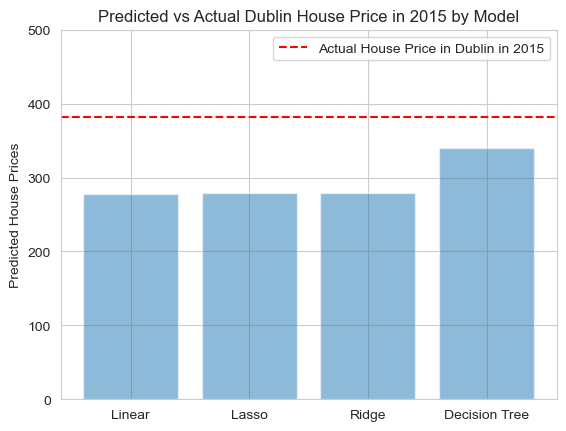

In [122]:
# Collect predicted values for each model in a list
predictions = [predicted_dublin_2015_linear, predicted_dublin_2015_lasso, predicted_dublin_2015_ridge, predicted_dublin_2015_dt]

# Create a list of model names
model_names = ['Linear', 'Lasso', 'Ridge', 'Decision Tree']

# Create a bar plot 
y_pos = np.arange(len(model_names)) # Create a list of integers from 0 to the number of models
plt.bar(y_pos, predictions, align='center', alpha=0.5) # Create a bar plot using the predictions and model names
plt.xticks(y_pos, model_names) # Add model names as x-axis tick labels
plt.ylabel('Predicted House Prices') # Add y-axis label
plt.title('Predicted vs Actual Dublin House Price in 2015 by Model') # Add plot title
plt.ylim(0, 500) # Set the y-axis limit to 0 and 500

# Add the actual value as a horizontal line
plt.axhline(y=actual_dublin_2015, color='r', linestyle='--', label='Actual House Price in Dublin in 2015') # Add a horizontal line using the actual value
plt.legend() # Display the legend

# Display the plot
plt.show();


# The closest result is from Decision Tree

While linear models like Linear Regression, Lasso Regression, and Ridge Regression assume a linear relationship, Decision Trees can capture non-linear correlations between data and the target variable. A Decision Tree tends to perform better if the relationship between the features and the target variable is non-linear. 